# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Haiqel Aziizul Hakeem
- Email: haiqelhakeem@gmail.com
- Id Dicoding: Haiqelhakeem

## Persiapan

### Menyiapkan library yang dibutuhkan

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
file_id = "1cVLecmZsDZwJWskoODcMVxkJeBeyjSpA"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "employee_data.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1cVLecmZsDZwJWskoODcMVxkJeBeyjSpA
To: /content/employee_data.csv
100%|██████████| 226k/226k [00:00<00:00, 43.8MB/s]


'employee_data.csv'

In [3]:
df = pd.read_csv("employee_data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [4]:
df.head().T

,0,1,2,3,4
EmployeeId,1,2,3,4,5
Age,38,37,51,42,40
Attrition,NaN,1.0,1.0,0.0,NaN
BusinessTravel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1444,1141,1323,555,1194
Department,Human Resources,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,11,4,26,2
Education,4,2,4,3,4
EducationField,Other,Medical,Life Sciences,Marketing,Medical
EmployeeCount,1,1,1,1,1


In [5]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("Info df:")
df.info()

Jumlah baris: 1470
Jumlah kolom: 35
Info df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement    

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [7]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


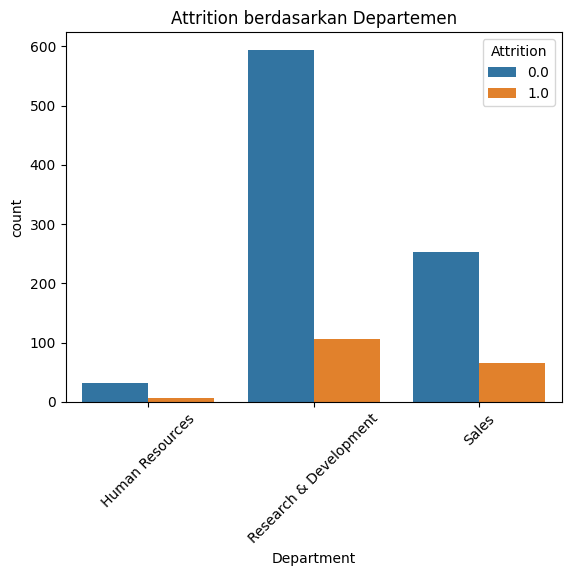

In [8]:
sns.countplot(data=df, x='Department', hue='Attrition')
plt.xticks(rotation=45)
plt.title("Attrition berdasarkan Departemen")
plt.show()

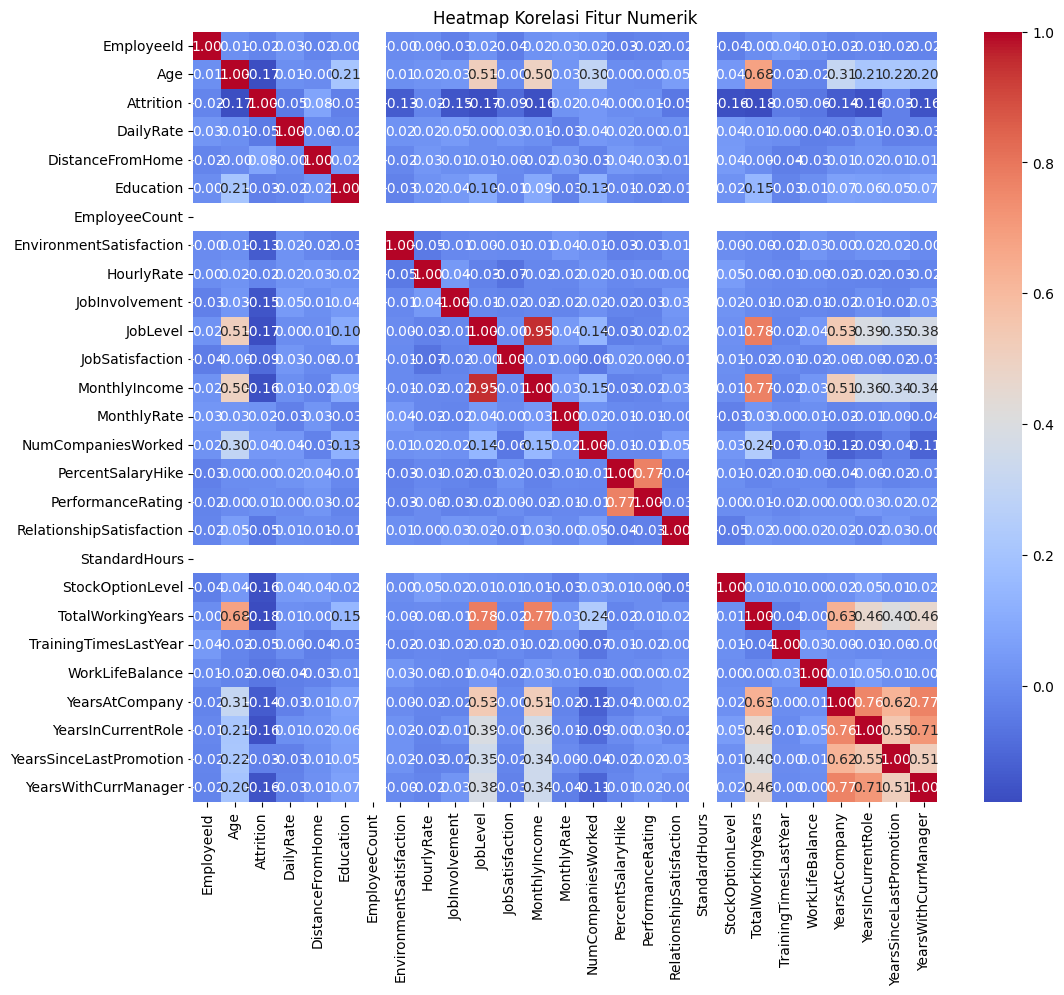

In [9]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

## Data Preparation / Preprocessing

In [10]:
df['Over18'] = df['Over18'].map({'Y': 1, 'N': 0}).astype(int)

In [11]:
df_train = df[df['Attrition'].notnull()].copy()
df_train['Attrition'] = df_train['Attrition'].astype(int)

In [12]:
df_train.head().T

,1,2,3,6,7
EmployeeId,2,3,4,7,8
Age,37,51,42,40,55
Attrition,1,1,0,0,1
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely
DailyRate,1141,1323,555,1124,725
Department,Research & Development,Research & Development,Sales,Sales,Research & Development
DistanceFromHome,11,4,26,1,2
Education,2,4,3,2,3
EducationField,Medical,Life Sciences,Marketing,Medical,Medical
EmployeeCount,1,1,1,1,1


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   int64 
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                  105

In [14]:
X = df_train.drop(columns=['Attrition'])
y = df_train['Attrition']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
num_cols = [col for col in X.columns if col not in cat_cols and col != 'EmployeeId']

In [17]:
# Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop'
)

In [18]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

## Modeling

In [19]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

In [20]:
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

In [21]:
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best params: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [22]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education', 'EmployeeCount',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement...
                                                   'Over18',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StandardHours',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        random_state=42))])

In [31]:
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'attrition_best_model.pkl')

['attrition_best_model.pkl']

## Evaluation

In [34]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       173
           1       1.00      0.18      0.30        39

    accuracy                           0.85       212
   macro avg       0.92      0.59      0.61       212
weighted avg       0.87      0.85      0.80       212



In [33]:
y_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC: {roc_auc:.4f}')

ROC-AUC: 0.7817


In [24]:
# Get parts of the pipeline
pipeline = grid_search.best_estimator_
preprocessor = pipeline.named_steps['preprocessor']
model = pipeline.named_steps['classifier']

# Get feature names
feature_names = []

# Loop through transformers in ColumnTransformer
for name, transformer, columns in preprocessor.transformers_:
    if name == 'num':
        feature_names.extend(columns)
    elif name == 'cat':
        # Get OneHotEncoded feature names
        ohe = transformer
        ohe_feature_names = ohe.get_feature_names_out(columns)
        feature_names.extend(ohe_feature_names)
    elif name == 'over18':
        feature_names.extend(columns)

In [25]:
importances = model.feature_importances_

feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feat_imp_df.head(15))

                    feature  importance
38            MonthlyIncome    0.063290
28                      Age    0.060615
39              MonthlyRate    0.057392
47        TotalWorkingYears    0.047217
30         DistanceFromHome    0.046436
29                DailyRate    0.043332
27             OverTime_Yes    0.042724
26              OverTime_No    0.037692
50           YearsAtCompany    0.036462
34               HourlyRate    0.036316
33  EnvironmentSatisfaction    0.033945
40       NumCompaniesWorked    0.031901
53     YearsWithCurrManager    0.029304
51       YearsInCurrentRole    0.027792
42        PercentSalaryHike    0.026912


In [26]:
print(feat_imp_df.head())

              feature  importance
38      MonthlyIncome    0.063290
28                Age    0.060615
39        MonthlyRate    0.057392
47  TotalWorkingYears    0.047217
30   DistanceFromHome    0.046436


In [27]:
X_unlabeled = df[df['Attrition'].isnull()].copy()  # for those without attrition labels
pred_probs = grid_search.predict_proba(X_unlabeled)[:, 1]  # probability of attrition

# Attach to dataframe for decision-making
X_unlabeled['Attrition_Probability'] = pred_probs

# Sort and look at employees at risk
at_risk = X_unlabeled.sort_values(by='Attrition_Probability', ascending=False)
print(at_risk[['EmployeeId', 'Attrition_Probability']].head(10))

      EmployeeId  Attrition_Probability
697          698               0.755167
948          949               0.750669
1214        1215               0.711900
791          792               0.616782
1060        1061               0.615917
1151        1152               0.553490
899          900               0.512332
1096        1097               0.511322
1363        1364               0.503893
1228        1229               0.503232


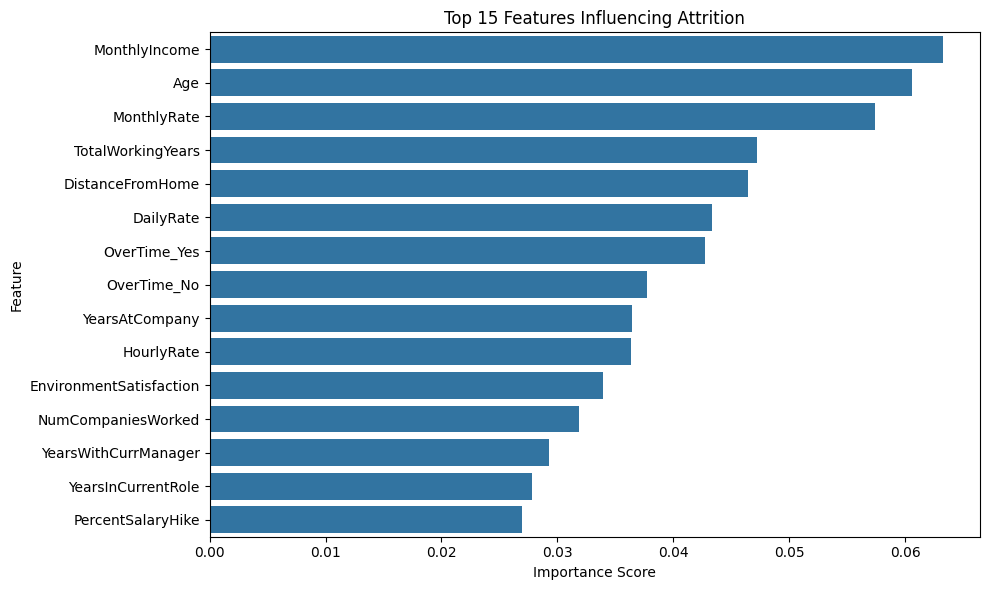

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_imp_df.head(15))
plt.title('Top 15 Features Influencing Attrition')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()